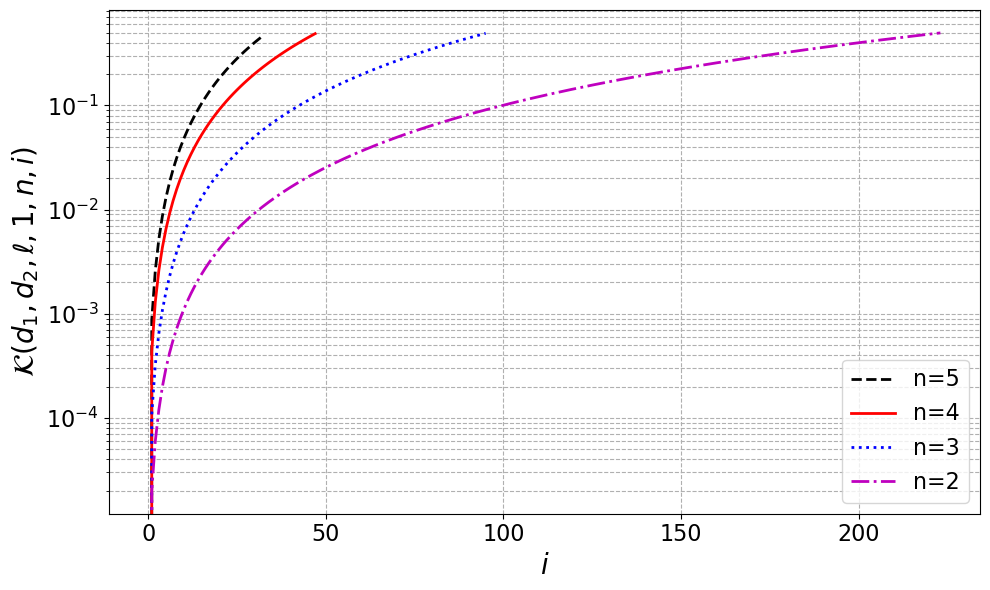

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = np.array([2, 3, 4, 5])  # block size (bits)
d1 = np.array([56, 17, 6, 3])  # number of distinct Clifford operators
ell = 2  # number of authentication bits
d2 = np.array([56, 17, 6, 3])  # number of distinct permutations

def imax(m, n, ell, d1, d2):
    return int(np.floor(np.sqrt(2**(m*(n+ell)) * d1**m * d2**m)))

def den(m, n, ell, d1, d2):
    return 2**(m*(n+ell)+1) * d1**m * d2**m

# Preallocate z
z = []

for k in range(len(n)):
    m = 1
    max_i = imax(m, n[k], ell, d1[k], d2[k])
    I = np.arange(1, max_i+1)
    denominator = den(m, n[k], ell, d1[k], d2[k])
    z_k = I * (I - 1) / denominator
    z.append(z_k)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(z[3], '--k', linewidth=2, label='n=5')
plt.plot(z[2], '-r', linewidth=2, label='n=4')
plt.plot(z[1], ':b', linewidth=2, label='n=3')
plt.plot(z[0], '-.m', linewidth=2, label='n=2')
plt.yscale('log')
plt.xlabel(r'$i$', fontsize=20)
plt.ylabel(r'$\mathcal{K}(d_1,d_2,\ell,1,n,i)$', fontsize=20)
plt.legend(loc='lower right', fontsize=16)
plt.grid(True, which="both", ls="--")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig('collisionprob.png')
plt.show()

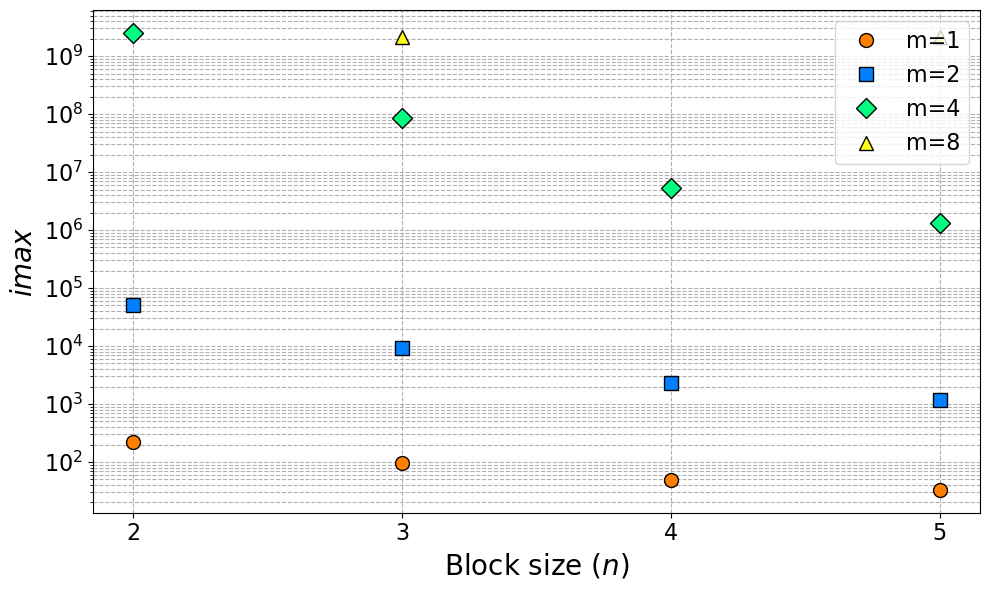

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(n, z[:, 0], 'o', markersize=10, markeredgecolor='black', markerfacecolor=(1, 0.5, 0), label='m=1')
plt.plot(n, z[:, 1], 's', markersize=10, markeredgecolor='black', markerfacecolor=(0, 0.5, 1), label='m=2')
plt.plot(n, z[:, 2], 'D', markersize=10, markeredgecolor='black', markerfacecolor=(0, 1, 0.5), label='m=4')
plt.plot(n, z[:, 3], '^', markersize=10, markeredgecolor='black', markerfacecolor=(1, 1, 0.1), label='m=8')  # Changed 'P' to '^'
plt.legend(loc='upper right', fontsize=16)
plt.yscale('log')
plt.grid(True, which="both", ls="--")
plt.xlabel(r'Block size ($n$)', fontsize=20)
plt.ylabel(r'$imax$', fontsize=20)
plt.xticks(n, fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig('cmax.png')
plt.show()

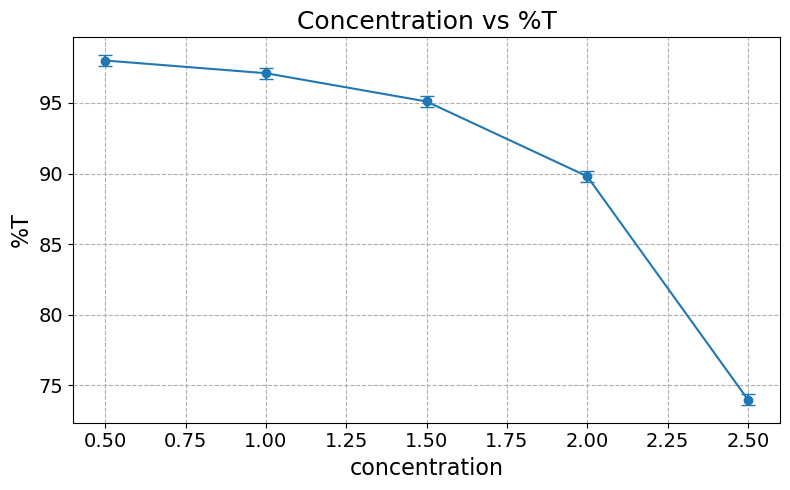

In [9]:
import matplotlib.pyplot as plt
import numpy as np

concentration = [0.5, 1, 1.5, 2, 2.5]
percent_T = [98, 97.1, 95.1, 89.8, 74]
error = [0.4] * len(percent_T)

plt.figure(figsize=(8, 5))
plt.errorbar(concentration, percent_T, yerr=error, fmt='o-', capsize=5, label='%T', color='C0')
plt.xlabel('concentration', fontsize=16)
plt.ylabel('%T', fontsize=16)
plt.title('Concentration vs %T', fontsize=18)
plt.grid(True, which="both", ls="--")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()